<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Рассчет-эффективности-обогащения" data-toc-modified-id="Рассчет-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Рассчет эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков" data-toc-modified-id="Анализ-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах" data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул" data-toc-modified-id="Сравнение-распределения-размеров-гранул-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-металлов-на-разных-стадиях" data-toc-modified-id="Исследуем-суммарную-концентрацию-металлов-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию металлов на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Построение-модели-и-её-оценка" data-toc-modified-id="Построение-модели-и-её-оценка-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Построение модели и её оценка</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

В нашем распоряжении данные золото обогатительного предприятия.

Наша задача подготовить модель предсказания коэффициент восстановления золота из золотосодержащей руды.

В ходе работы необходимо:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


In [1]:
# импортируем библиотеки
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score

## Подготовка данных

### Обзор данных

Данные находятся в трёх файлах:
- `gold_recovery_train_new.csv` — обучающая выборка;
- `gold_recovery_test_new.csv` — тестовая выборка;
- `gold_recovery_full_new.csv` — исходные данные.

Данные индексируются датой и временем получения информации (признак `date`). Соседние по времени параметры часто похожи.

**Откроим файлы с данными, изучим общую информацию.**

In [2]:
# читаем данные
try:
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except:
    data_train = pd.read_csv('https://restricted/datasets/gold_recovery_train_new.csv')
    data_test = pd.read_csv('https://restricted/datasets/gold_recovery_test_new.csv')
    data_full = pd.read_csv('https://restricted/datasets/gold_recovery_full_new.csv')

In [3]:
# Выведем общую инф о df
def df_info(df):
    display(df.head())
    display(df.info())
    display(df.describe())
    print("Количество дубликатов:", df.duplicated().sum())

Посмотрим на данные по обучающей выборке

In [4]:
df_info(data_train)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


Количество дубликатов: 0


Данные представлены в 87 столбцах и 14149 строках, дубликаты отсутствуют. Есть пропуски в данных

Посмотрим на данные по тестовой выборке

In [5]:
df_info(data_test)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


Количество дубликатов: 0


Данные представлены в 53 столбцах и 5290 строках, дубликаты отсутствуют. Есть пропуски в данных

Посмотрим информацию по исходным данным

In [6]:
df_info(data_full)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


Количество дубликатов: 0


Данные представлены в 87 столбцах и 19439 строках, дубликаты отсутствуют. Есть пропуски в данных

Размеры обучающей и тестовой выборок различаются (в части признаков), в тестовой выбороке нет целевых признаков. Есть пропуски в данных  
Требуется предобработка данных.

### Рассчет эффективности обогащения

По условиям зададачи необходимо проверьть правильность расчета эффективности обогащения. Для этого вычислим её на обучающей выборке для признака `rougher.output.recovery`. Найдем `MAE` между расчётным и фактическим значением признака

Эффективность обогащения рассчитывается по формуле  
$ Recovery = (C*(F-T))/(F*(C-T)) * 100 $  
где:
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

In [7]:
# Эффективность обогащения
def calc_enrichment(C, F, T):
    recovery = (C*(F-T))/(F*(C-T)) * 100
    return recovery

In [8]:
recovery = calc_enrichment(
    data_train['rougher.output.concentrate_au'],
    data_train['rougher.input.feed_au'],
    data_train['rougher.output.tail_au'],
)

# Найдем MAE между расчётным и фактическим значением признака
mean_absolute_error(data_train['rougher.output.recovery'], recovery)

9.73512347450521e-15

Средняя абсолютная ошибка между рассчитанной по формуле эффективностью обогащения и признаком из датасета близко к нулю, а значит эффективность обогащения в датасете рассчитана правильно.

### Анализ признаков

Как выявили ранее, размеры обучающей и тестовой выборок в части признаков различаются.  
Проанализируем признаки, недоступные в тестовой выборке

In [9]:
feature_diff = data_train.columns.difference(data_test.columns)
feature_diff

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

По описанию технологического процесса, признаки именуются следующим образом:  
`[этап].[тип_параметра].[название_параметра]`

Возможные значения для блока `[этап]`:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Возможные значения для блока `[тип_параметра]`:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

Таким образом признаки отсутствующие в тестовой выборке характеризуют:
- финальные характеристики продукта
- характеристики продукта при первичной очистке
- расчетные характеристики флотации
- характеристики продукта при флотации
- характеристики продукта при вторичной очистке

Наряду с этим в тестовой выборке отсутствуют целевые признаки `final.output.recovery` и `rougher.output.recovery`

### Предобработка данных

Пропуски присутствуют во всех трех выборках

В тестовой выборке заполнить пропуски средним значением или каким-то другим мы не можем - это исказит результаты тестирования модели. Поэтому принимаем решение - удалить строки с пропущенными значениями.

In [10]:
data_test = data_test.dropna()
print('Количество пропусков', data_test.isna().sum().sum())

Количество пропусков 0


В обучающей выборке пропуски заполним методом interpolate() (расчитывает значение между предыдущей и следующей строкой), т.к. по условиям техпроцесса - соседние по времени параметры часто похожи и с целью оставить как можно больше данных для обучения модели

In [11]:
data_train = data_train.interpolate()
print('Количество пропусков', data_train.isna().sum().sum())

Количество пропусков 0


Аналогичным образом поступим и с исходными данными

In [12]:
data_full = data_full.interpolate()
print('Количество пропусков', data_full.isna().sum().sum())

Количество пропусков 0


В ходе данного шага:
- провели обзор данных;
- проверили правильность расчета эффективности обогащения;
- выявили признаки недоступные в тестовой выборке;
- обработали пропуски в данных.

## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах

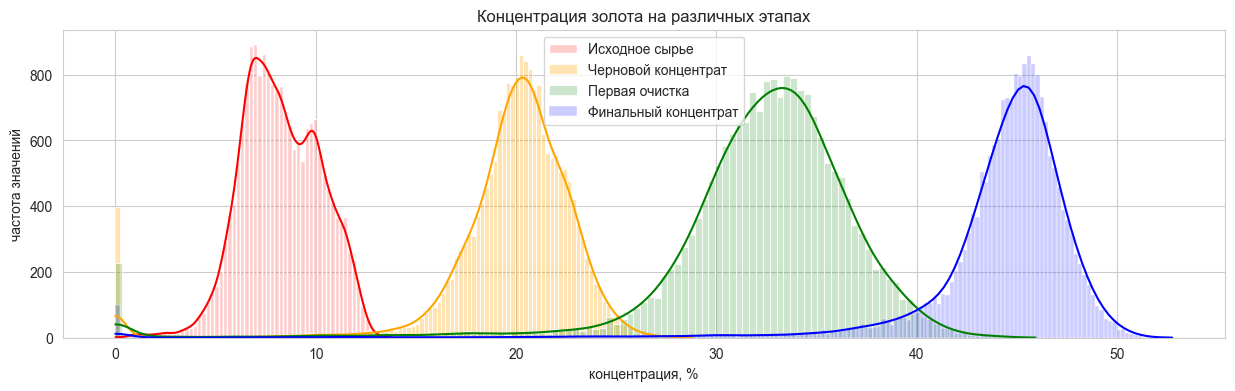

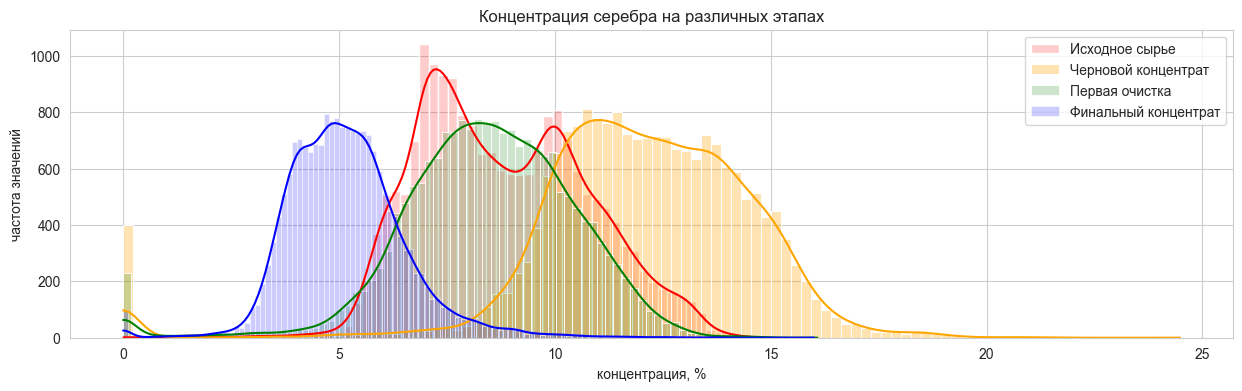

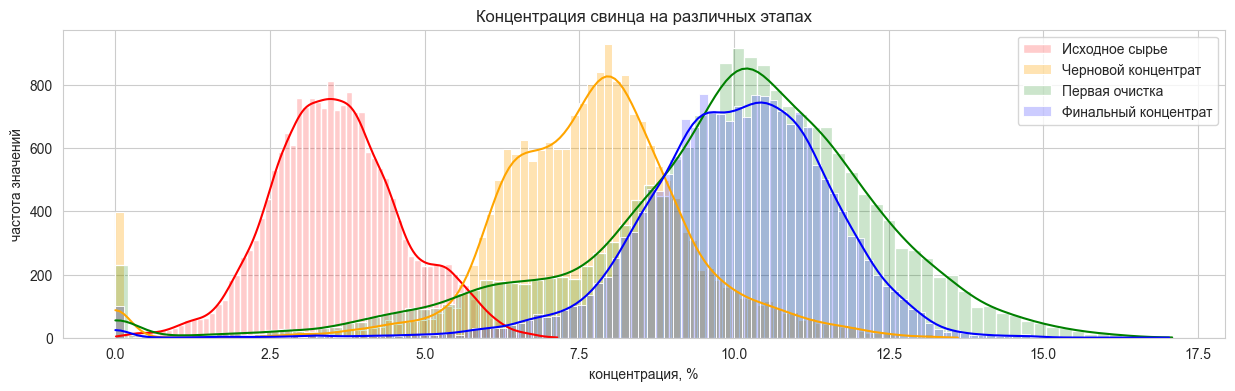

In [13]:

for metall, metall_name in zip(['au','ag','pb'], ['золота', 'серебра', 'свинца']):
    plt.figure(figsize=(15,4))
    sns.set_style('whitegrid')
    sns.histplot(data_full['rougher.input.feed_' + metall], color="red", kde=True, label='Исходное сырье', alpha=0.2)
    sns.histplot(data_full['rougher.output.concentrate_' + metall], color="orange", kde=True, label='Черновой концентрат', alpha=0.3)
    sns.histplot(data_full['primary_cleaner.output.concentrate_' + metall], color='green', kde=True, label='Первая очистка', alpha=0.2)
    sns.histplot(data_full['final.output.concentrate_' + metall], color='blue', kde=True, label='Финальный концентрат', alpha=0.2)
    
    plt.legend()
    # plt.grid()
    plt.title(f'Концентрация {metall_name} на различных этапах')
    plt.xlabel('концентрация, %')
    plt.ylabel('частота значений')
    plt.show()

Что можно понять из графиков:
- концентрация золота повышается с каждым этапом. Цель флотации и очисток увеличить концентрацию золота;
- концентрация серебра понижается;
- концентрация свинца повышается. Это связано с химическим процесами очищения золота.

Так же на графиках отчетливо видны нулевые значения концентраций. Это явная ошибка. Скорее всего это связано со сбоем измерительного оборудования. В дальнейшем уберем эти значения из обучающих данных

### Сравнение распределения размеров гранул

Сравним распределение размеров гранул исходного сырья и на входе при первичной очистке для обучающей и тестовой выборки

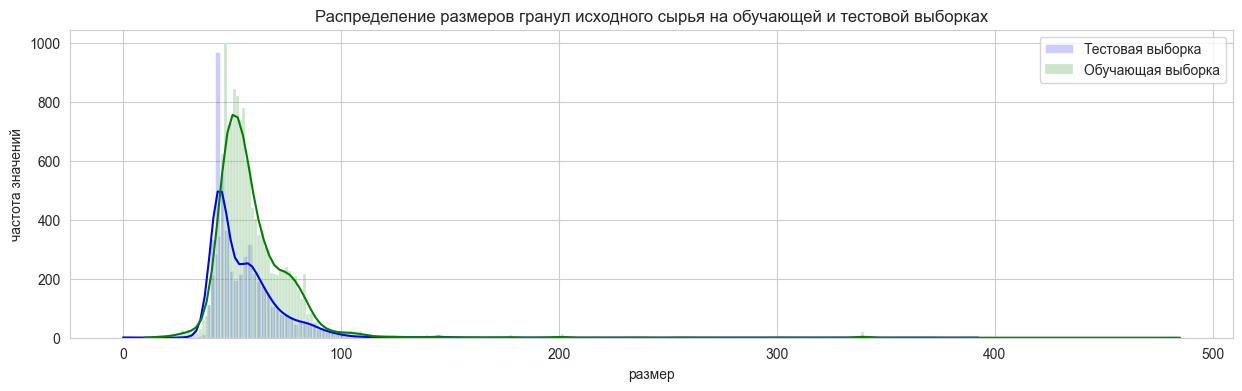

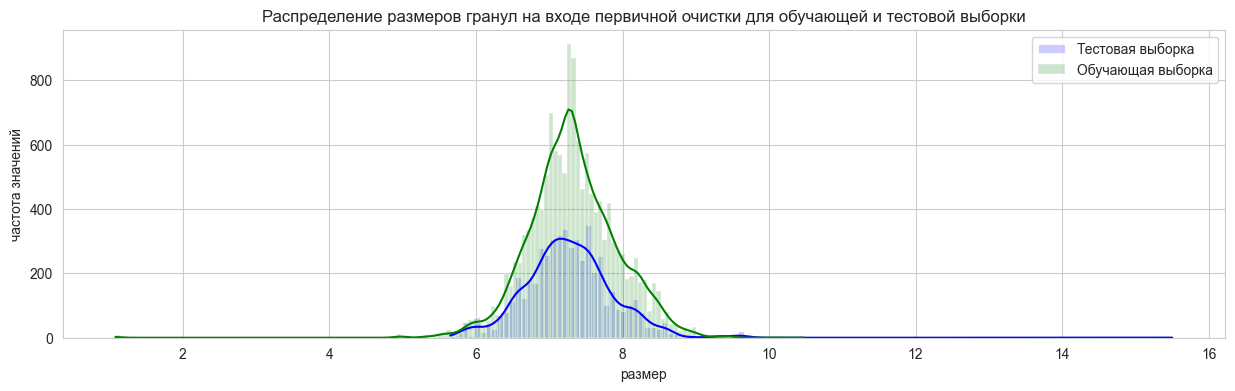

In [14]:
# Распределение размеров гранул исходного сырья
plt.figure(figsize=(15,4))
sns.histplot(data_test['rougher.input.feed_size'], color="blue", kde=True, label='Тестовая выборка', alpha=0.2)
sns.histplot(data_train['rougher.input.feed_size'], color="green", kde=True, label='Обучающая выборка', alpha=0.2)

plt.legend()
# plt.grid()
plt.title('Распределение размеров гранул исходного сырья на обучающей и тестовой выборках')
plt.xlabel('размер')
plt.ylabel('частота значений')
plt.show()

# Распределение размеров гранул на входе первичной очистки
plt.figure(figsize=(15,4))
sns.histplot(data_test['primary_cleaner.input.feed_size'], color="blue", kde=True, label='Тестовая выборка', alpha=0.2)
sns.histplot(data_train['primary_cleaner.input.feed_size'], color="green", kde=True, label='Обучающая выборка', alpha=0.2)

plt.legend()
# plt.grid()
plt.title('Распределение размеров гранул на входе первичной очистки для обучающей и тестовой выборки')
plt.xlabel('размер')
plt.ylabel('частота значений')
plt.show()

Видно, что распределения похожи, а значит оценка модели будет правильной.

### Исследуем суммарную концентрацию металлов на разных стадиях

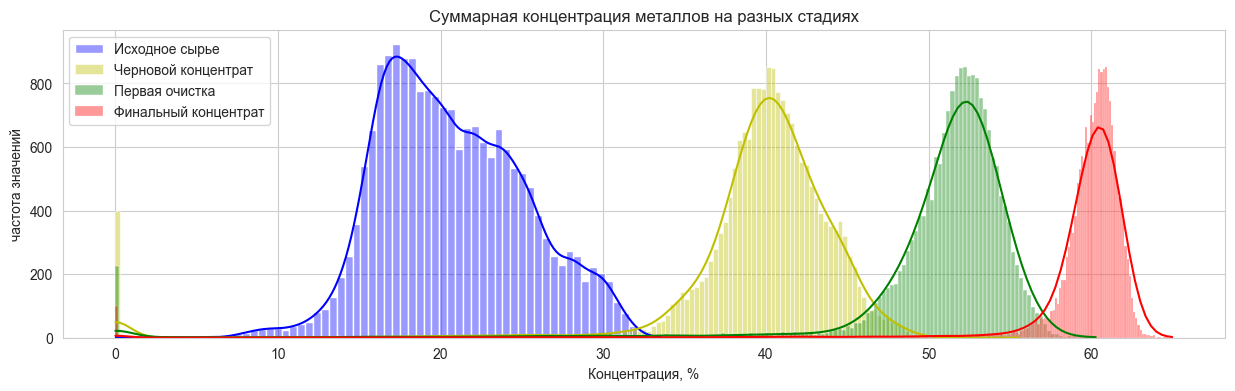

In [15]:
plt.figure(figsize=(15,4))
sns.set_style('whitegrid')
for stage, stage_name, color in zip(['rougher.input.feed_','rougher.output.concentrate_','primary_cleaner.output.concentrate_', 'final.output.concentrate_'], 
                             ['Исходное сырье', 'Черновой концентрат', 'Первая очистка', 'Финальный концентрат'],
                             ['b', 'y', 'g', 'r']):
    sns.histplot(data_full[[stage+'au', stage+'ag',stage+'pb']].sum(axis=1),color=color, kde=True, label=stage_name, alpha=0.4)

plt.title('Cуммарная концентрация металлов на разных стадиях')
plt.xlabel('Концентрация, %')
plt.ylabel('частота значений')
plt.legend()
plt.show()   

Отчетливо видно, что концентрация металлов повышается с каждым этапом.  
Так же просматриваются нулевые значения концентраций.

В ходе данного шага:
- оценили изменения концентрации металлов (Au, Ag, Pb) на различных этапах
- сравнили распределение размеров гранул исходного сырья и на входе при первичной очистке для обучающей и тестовой выборки
- исследовали суммарную концентрацию металлов на разных стадиях

## Модель

### Подготовка данных

Уберем нулевые значения из обучающих данных, выявленные на предыдущем этапе

In [16]:
for col in ['rougher.input.feed_','rougher.output.concentrate_','primary_cleaner.output.concentrate_', 'final.output.concentrate_']:
    data_train = data_train[data_train[col + 'au']>0]
    data_train = data_train[data_train[col + 'ag']>0]
    data_train = data_train[data_train[col + 'pb']>0]

Добавим в тестовый набор целевые признаки

In [17]:
# Сделаем индексом датафреймов поле date
data_full.set_index(data_full['date'], drop=True, inplace=True)
data_train.set_index(data_train['date'], drop=True, inplace=True)
data_test.set_index(data_test['date'], drop=True, inplace=True)

data_train = data_train.drop('date', axis=1)
data_test = data_test.drop('date', axis=1)

#Добавим в тестовый набор целевые признаки
data_test = data_test.join(data_full.loc[data_test.index][['final.output.recovery','rougher.output.recovery']])
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5229 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5229 non-null   float64
 1   primary_cleaner.input.depressant            5229 non-null   float64
 2   primary_cleaner.input.feed_size             5229 non-null   float64
 3   primary_cleaner.input.xanthate              5229 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5229 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5229 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5229 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5229 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5229 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5229 non-null

Так как размеры обучающей и тестовой выборок различаются (в части признаков) приведем обучающую выборку к одному размеру с тестовой

In [18]:
data_train = data_train[data_test.columns]

Подготовим признаки

In [19]:
target_signs = ['rougher.output.recovery', 'final.output.recovery']

# Подготовим признаки для обучения
target_train_rougher = data_train[target_signs[0]]
target_train_final = data_train[target_signs[1]]
features_train = data_train.drop(target_signs, axis=1)

# Подготовим признаки для теста
target_test_rougher = data_test[target_signs[0]]
target_test_final = data_test[target_signs[1]]
features_test = data_test.drop(target_signs, axis=1)

print("Размерность тренеровочных данных", features_train.shape)
print("Размерность тестовых данных", features_test.shape)

Размерность тренеровочных данных (13725, 52)
Размерность тестовых данных (5229, 52)


### Построение модели и её оценка

In [20]:
# функция для расчета sMAPE
def smape(target, predictions):
    smape = 100/len(target) * sum(2*abs(target - predictions) / (abs(target)+abs(predictions)))
    return smape
# функция для расчета итогового sMAPE
def final_smape(r_smape, f_smape):
    return abs(0.25*r_smape + 0.75*f_smape)

In [21]:
# Создадим метрику для поиска оптимального решения
scorer = make_scorer(smape, greater_is_better=False)

In [22]:
# используем кросс-валидацию
cv = KFold(n_splits=3, shuffle=False)

**Модель на основе Логистической регрессии**

In [23]:
# Создадим модель, объявим переменные
model_lgr = LinearRegression()
lgr_rougher = cross_val_score(model_lgr, features_train, target_train_rougher,
                             scoring=scorer, cv=cv, n_jobs=-1).mean()
lgr_final = cross_val_score(model_lgr, features_train, target_train_final,
                             scoring=scorer, cv=cv, n_jobs=-1).mean()
print('Итоговое sMAPE', final_smape(lgr_rougher, lgr_final))

Итоговое sMAPE 12.649360186573364


**Модель на основе Случайного леса**

In [24]:
# Создадим модель, объявим переменные
model_rfc = RandomForestRegressor(random_state=12345)

param_grid_rfc = {
    'n_estimators': range(10, 510, 50),
    'max_depth' : [None] + [i for i in range(2, 11)]
}

# Обучение
cv_rfc = GridSearchCV(estimator=model_rfc, 
                      param_grid=param_grid_rfc, 
                      cv=cv,
                      n_jobs=-1,
                      scoring=scorer,
                      verbose=10
                     )

cv_rfc_rougher = cv_rfc.fit(features_train, target_train_rougher)
cv_rfc_final = cv_rfc.fit(features_train, target_train_final)

print('Итоговое sMAPE', final_smape(cv_rfc_rougher.best_score_, cv_rfc_final.best_score_))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Итоговое sMAPE 10.144783143487258


Таким образом наиболее лучшей моделью является Модель на основе Случайного леса, итоговое sMAPE 10.14

**Проверка модели на тестовой выборке**

In [25]:
predict_test_rougher = cv_rfc_rougher.best_estimator_.predict(features_test)
predict_test_final = cv_rfc_final.best_estimator_.predict(features_test)

test_smape_r = smape(target_test_rougher, predict_test_rougher)
test_smape_f = smape(target_test_final, predict_test_final)

print('Итоговое sMAPE', final_smape(test_smape_r, test_smape_f))

Итоговое sMAPE 13.135973875472796


**Проверка модели на адекватность**

In [26]:
dummy_model = DummyRegressor(strategy='mean')

dummy_rougher = dummy_model.fit(features_train, target_train_rougher)
dummy_final = dummy_model.fit(features_train, target_train_final)

dummy_predict_test_rougher = dummy_rougher.predict(features_test)
dummy_predict_test_final = dummy_final.predict(features_test)

dummy_smape_r = smape(target_test_rougher, dummy_predict_test_rougher)
dummy_smape_f = smape(target_test_final, dummy_predict_test_final)

print('Итоговое sMAPE', final_smape(dummy_smape_r, dummy_smape_f))


Итоговое sMAPE 14.503509689970741


Так как `Итоговое sMAPE` у модели ниже чем у `DummyRegressor`, то модель можно признать адекватной

## Вывод

В ходе проделанной работы было выполнено:

В рамках подготовки данных:
- проверена формула вычисления эффективности обогащения;
- проанализированы признаки, недоступные в тестовой выборке;
- проведена предобработка данных.

В рамках анализа данных:
- исследовано изменение концентрации элементов на каждом этапе;
- проанализированы распределения размеров гранул на обучающей и тестовой выборках;
- исследованы суммарные концентрации.

Написана функция для вычисления итогового sMAPE. Построено и обучено нескольео моделей прогнозирования. Выбрана лучшая модель, её качество проверено на тестовой выборке и прошло проверку DummyRegressor.